# B73 vs BTx623 expression dynamic comparisons look like an hourglass
Does this support a conserved mid-transition during SPM definition in maize  
Or is this evidence that all stages are conserved, except SPM definition?  

Maybe comparing the age dynamics of expressed transcripts can explain  

Seems like there are two stages:  
 1. Identify transcript age and substitution rate for all genes (Maize and Sorghum separately)  
 2. Calculate relative contribution for each considered time point  

There are some interesting packages for this analysis available.  
I will try using phylostratr to define age: https://github.com/arendsee/phylostratr  
And myTAI to calcuate phylostratrographic values: https://hajkd.github.io/myTAI/index.html

## Phylostratr workflow
Phylostratr uses the UniProt database of all protein sequences  
and the NCBI tree of life definitions to compare and calcuate protein differences  

In [2]:
#install phylotratr
library(devtools)
install_github("arendsee/phylostratr")

from URL https://api.github.com/repos/arendsee/phylostratr/zipball/master
Installing phylostratr
Installing ape
Installing Rcpp
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/5g/8m48_y6j031cwg17tfnqtc1c0000gn/T/RtmpN29kRa/devtoolsace545bfe332/Rcpp'  \
  --library='/Library/Frameworks/R.framework/Versions/3.4/Resources/library'  \
  --install-tests 

'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/5g/8m48_y6j031cwg17tfnqtc1c0000gn/T/RtmpN29kRa/devtoolsace510feb280/ape'  \
  --library='/Library/Frameworks/R.framework/Versions/3.4/Resources/library'  \
  --install-tests 

Installing curl
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/5g/8m48_y6j031cwg17tfnqtc1c0000gn/T/RtmpN29k

Skipping install of 'tidyr' from a cran remote, the SHA1 (0.8.2) has not changed since last install.
  Use `force = TRUE` to force installation
from URL https://api.github.com/repos/arendsee/taxizedb/zipball/master
Installing taxizedb
Installing DBI
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/5g/8m48_y6j031cwg17tfnqtc1c0000gn/T/RtmpN29kRa/devtoolsace525537c2/DBI'  \
  --library='/Library/Frameworks/R.framework/Versions/3.4/Resources/library'  \
  --install-tests 

Installing dbplyr
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/5g/8m48_y6j031cwg17tfnqtc1c0000gn/T/RtmpN29kRa/devtoolsace5507afdd3/dbplyr'  \
  --library='/Library/Frameworks/R.framework/Versions/3.4/Resources/library'  \
  --install-tests 

Installing hoardr
Installing rappdirs
'/Library/Frameworks/R.framework/R

In [8]:
library(phylostratr)
library(magrittr)

In [5]:
focal_id <- '4577' #maize

In [16]:
strata <- uniprot_strata(focal_id, from=2) %>%
            strata_apply(f=diverse_subtree, n=6, weights=uniprot_weight_by_ref()) %>%
            use_recommended_prokaryotes %>%
            add_taxa(c('3702','4932', '9606')) %>%
            uniprot_fill_strata

In [17]:
strata

Strata object
focal species: 4577
data:          faa
#species:      127
S4 Slots:
  x@tree
  x@data
  x@focal_species

In [55]:
tree_names(strata)

[1] "3702"    "4932"    "9606"    "1194090" "1797576" "572547"  "906968" 
  [8] "667014"  "653733"  "522772"  "1184387" "638303"  "445932"  "1408204"
 [15] "515635"  "511051"  "981222"  "234267"  "401053"  "1325564" "469616" 
 [22] "1805218" "1703384" "1797384" "314345"  "857265"  "1797220" "1945860"
 [29] "1628278" "441768"  "1895832" "1262851" "266117"  "1121877" "1003195"
 [36] "872965"  "926550"  "1805232" "1703396" "360412"  "479434"  "357808" 
 [43] "661478"  "1303518" "937777"  "573058"  "1555112" "888062"  "1917462"
 [50] "1262887" "617121"  "1956166" "1008392" "1313304" "1896212" "313628" 
 [57] "1437425" "1142394" "1387353" "1307763" "481448"  "1262865" "320771" 
 [64] "497964"  "199"     "48"      "1183438" "1798435" "377431"  "1524460"
 [71] "634771"  "1660162" "242619"  "525373"  "1945862" "1803813" "1775755"
 [78] "351160"  "190192"  "387631"  "186497"  "1495144" "797303"  "419665" 
 [85] "187420"  "1903181" "1237085" "1365176" "9598"    "5786"    "44415"  
 [92] "5671"    "611791"  "280699"  "70448"   "564608"  "574566"  "3076"   
 [99] "1157962" "145388"  "105231"  "3218"    "3197"    "88036"   "13333"  
[106] "4113"    "57577"   "3562"    "56857"   "4432"    "29655"   "906689" 
[113] "1088818" "214687"  "42345"   "4615"    "15368"   "4572"    "112509" 
[120] "4537"    "39946"   "77586"   "4555"    "888268"  "206008"  "4558"   
[127] "4577"    "131567"  "2759"    "33090"   "35493"   "3193"    "58023"  
[134] "3398"    "1437183" "71240"   "1437201" "71275"   "71241"   "4447"   
[141] "1437197" "4747"    "4734"    "38820"   "4479"    "359160"  "147368" 
[148] "147389"  "1648021" "4527"    "147369"  "147428"  "147429"  "3041"   
[155] "13792"   "75966"   "3166"    "33154"   "207598"  "2"       "74152"  
[162] "57723"   "1224"    "68525"   "1783272" "201174"  "200795"  "67819"  
[169] "1239"    "1783270" "65842"   "68336"   "976"     "1783257" "203682" 
[176] "74201"   "2157"    "28890"   "2290931" "2283794" "1783275"

In [18]:
strata@data$faa[['4577']]
# was downloaded to a local file ./uniprot-seqs/4577.faa

[1] "uniprot-seqs/4577.faa"

In [21]:
# point instead to local ~/Desktop/maize_genome_res/maize_genome/Zea_mays.AGPv3.30.pep.all.fa
strata@data$faa[['4577']] <- '~/Desktop/maize_genome_res/maize_genome/Zea_mays.AGPv3.30.pep.all.fa'
strata@data$faa[['4577']]

[1] "~/Desktop/maize_genome_res/maize_genome/Zea_mays.AGPv3.30.pep.all.fa"

In [20]:
strata@data$faa

$`3702`
[1] "uniprot-seqs/3702.faa"

$`4932`
[1] "uniprot-seqs/4932.faa"

$`9606`
[1] "uniprot-seqs/9606.faa"

$`1194090`
[1] "uniprot-seqs/1194090.faa"

$`1797576`
[1] "uniprot-seqs/1797576.faa"

$`572547`
[1] "uniprot-seqs/572547.faa"

$`906968`
[1] "uniprot-seqs/906968.faa"

$`667014`
[1] "uniprot-seqs/667014.faa"

$`653733`
[1] "uniprot-seqs/653733.faa"

$`522772`
[1] "uniprot-seqs/522772.faa"

$`1184387`
[1] "uniprot-seqs/1184387.faa"

$`638303`
[1] "uniprot-seqs/638303.faa"

$`445932`
[1] "uniprot-seqs/445932.faa"

$`1408204`
[1] "uniprot-seqs/1408204.faa"

$`515635`
[1] "uniprot-seqs/515635.faa"

$`511051`
[1] "uniprot-seqs/511051.faa"

$`981222`
[1] "uniprot-seqs/981222.faa"

$`234267`
[1] "uniprot-seqs/234267.faa"

$`401053`
[1] "uniprot-seqs/401053.faa"

$`1325564`
[1] "uniprot-seqs/1325564.faa"

$`469616`
[1] "uniprot-seqs/469616.faa"

$`1805218`
[1] "uniprot-seqs/1805218.faa"

$`1703384`
[1] "uniprot-seqs/1703384.faa"

$`1797384`
[1] "uniprot-seqs/1797384.faa"

$`314345`
[1] "uniprot-seqs/314345.faa"

$`857265`
[1] "uniprot-seqs/857265.faa"

$`1797220`
[1] "uniprot-seqs/1797220.faa"

$`1945860`
[1] "uniprot-seqs/1945860.faa"

$`1628278`
[1] "uniprot-seqs/1628278.faa"

$`441768`
[1] "uniprot-seqs/441768.faa"

$`1895832`
[1] "uniprot-seqs/1895832.faa"

$`1262851`
[1] "uniprot-seqs/1262851.faa"

$`266117`
[1] "uniprot-seqs/266117.faa"

$`1121877`
[1] "uniprot-seqs/1121877.faa"

$`1003195`
[1] "uniprot-seqs/1003195.faa"

$`872965`
[1] "uniprot-seqs/872965.faa"

$`926550`
[1] "uniprot-seqs/926550.faa"

$`1805232`
[1] "uniprot-seqs/1805232.faa"

$`1703396`
[1] "uniprot-seqs/1703396.faa"

$`360412`
[1] "uniprot-seqs/360412.faa"

$`479434`
[1] "uniprot-seqs/479434.faa"

$`357808`
[1] "uniprot-seqs/357808.faa"

$`661478`
[1] "uniprot-seqs/661478.faa"

$`1303518`
[1] "uniprot-seqs/1303518.faa"

$`937777`
[1] "uniprot-seqs/937777.faa"

$`573058`
[1] "uniprot-seqs/573058.faa"

$`1555112`
[1] "uniprot-seqs/1555112.faa"

$`888062`
[1] "uniprot-seqs/888062.faa"

$`1917462`
[1] "uniprot-seqs/1917462.faa"

$`1262887`
[1] "uniprot-seqs/1262887.faa"

$`617121`
[1] "uniprot-seqs/617121.faa"

$`1956166`
[1] "uniprot-seqs/1956166.faa"

$`1008392`
[1] "uniprot-seqs/1008392.faa"

$`1313304`
[1] "uniprot-seqs/1313304.faa"

$`1896212`
[1] "uniprot-seqs/1896212.faa"

$`313628`
[1] "uniprot-seqs/313628.faa"

$`1437425`
[1] "uniprot-seqs/1437425.faa"

$`1142394`
[1] "uniprot-seqs/1142394.faa"

$`1387353`
[1] "uniprot-seqs/1387353.faa"

$`1307763`
[1] "uniprot-seqs/1307763.faa"

$`481448`
[1] "uniprot-seqs/481448.faa"

$`1262865`
[1] "uniprot-seqs/1262865.faa"

$`320771`
[1] "uniprot-seqs/320771.faa"

$`497964`
[1] "uniprot-seqs/497964.faa"

$`199`
[1] "uniprot-seqs/199.faa"

$`48`
[1] "uniprot-seqs/48.faa"

$`1183438`
[1] "uniprot-seqs/1183438.faa"

$`1798435`
[1] "uniprot-seqs/1798435.faa"

$`377431`
[1] "uniprot-seqs/377431.faa"

$`1524460`
[1] "uniprot-seqs/1524460.faa"

$`634771`
[1] "uniprot-seqs/634771.faa"

$`1660162`
[1] "uniprot-seqs/1660162.faa"

$`242619`
[1] "uniprot-seqs/242619.faa"

$`525373`
[1] "uniprot-seqs/525373.faa"

$`1945862`
[1] "uniprot-seqs/1945862.faa"

$`1803813`
[1] "uniprot-seqs/1803813.faa"

$`1775755`
[1] "uniprot-seqs/1775755.faa"

$`351160`
[1] "uniprot-seqs/351160.faa"

$`190192`
[1] "uniprot-seqs/190192.faa"

$`387631`
[1] "uniprot-seqs/387631.faa"

$`186497`
[1] "uniprot-seqs/186497.faa"

$`1495144`
[1] "uniprot-seqs/1495144.faa"

$`797303`
[1] "uniprot-seqs/797303.faa"

$`419665`
[1] "uniprot-seqs/419665.faa"

$`187420`
[1] "uniprot-seqs/187420.faa"

$`1903181`
[1] "uniprot-seqs/1903181.faa"

$`1237085`
[1] "uniprot-seqs/1237085.faa"

$`1365176`
[1] "uniprot-seqs/1365176.faa"

$`9598`
[1] "uniprot-seqs/9598.faa"

$`5786`
[1] "uniprot-seqs/5786.faa"

$`44415`
[1] "uniprot-seqs/44415.faa"

$`5671`
[1] "uniprot-seqs/5671.faa"

$`611791`
[1] "uniprot-seqs/611791.faa"

$`280699`
[1] "uniprot-seqs/280699.faa"

$`70448`
[1] "uniprot-seqs/70448.faa"

$`564608`
[1] "uniprot-seqs/564608.faa"

$`574566`
[1] "uniprot-s

In [29]:
strata_b <- strata_blast(strata, makedb_args = list(verbose = T), blast_args = list(nthreads = 3))

Skipping 3702
Skipping 4932
Skipping 9606
Skipping 1194090
Skipping 1797576
Skipping 572547
Skipping 906968
Skipping 667014
Skipping 653733
Skipping 522772
Skipping 1184387
Skipping 638303
Skipping 445932
Skipping 1408204
Skipping 515635
Skipping 511051
Skipping 981222
Skipping 234267
Skipping 401053
Skipping 1325564
Skipping 469616
Skipping 1805218
Skipping 1703384
Skipping 1797384
Skipping 314345
Skipping 857265
Skipping 1797220
Skipping 1945860
Skipping 1628278
Skipping 441768
Skipping 1895832
Skipping 1262851
Skipping 266117
Skipping 1121877
Skipping 1003195
Skipping 872965
Skipping 926550
Skipping 1805232
Skipping 1703396
Skipping 360412
Skipping 479434
Skipping 357808
Skipping 661478
Skipping 1303518
Skipping 937777
Skipping 573058
Skipping 1555112
Skipping 888062
Skipping 1917462
Skipping 1262887
Skipping 617121
Skipping 1956166
Skipping 1008392
Skipping 1313304
Skipping 1896212
Skipping 313628
Skipping 1437425
Skipping 1142394
Skipping 1387353
Skipping 1307763
Skipping 481448
S

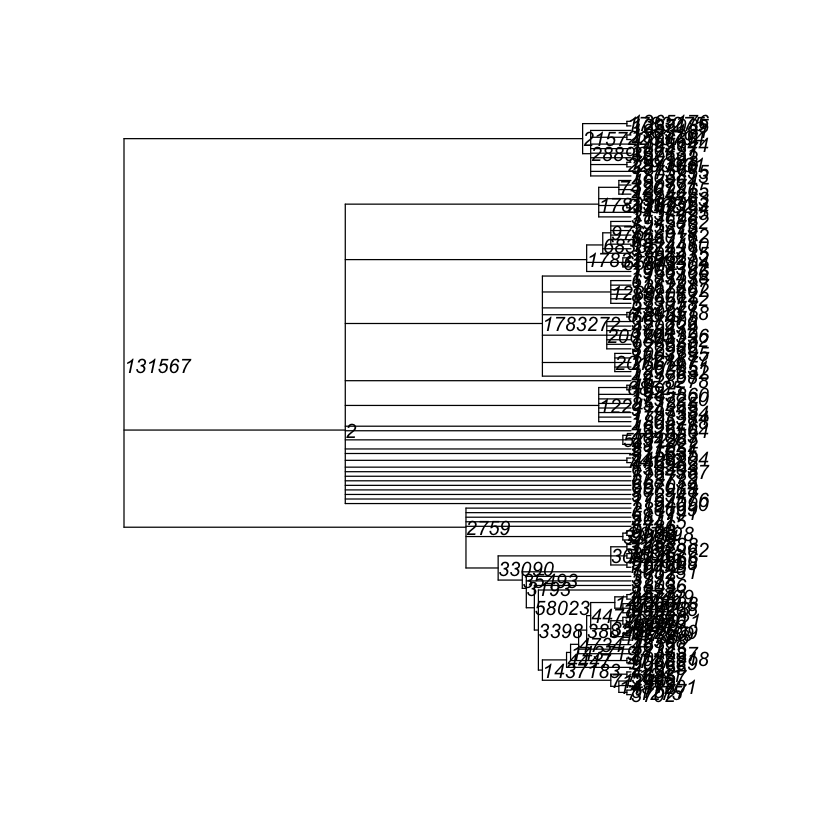

In [30]:
plot(strata_b)

In [33]:
ls()

[1] "focal_id" "strata"   "strata_b" "verbose"

In [34]:
results_b <- strata_b %>% strata_besthits %>% merge_besthits

In [37]:
#gene heatmap, columns are genes (displayed in group of n="")
#rows are taxa according to tree
plot_heatmaps(results_b, 
              'B73_phylostratr.pdf', 
              tree=strata_b@tree, 
              focal_id=focal_id,
              to_name=T)

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespa

Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespa

Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Found more than one class "phylo" in cache; using the first, from namespace 'phylostratr'
Also defined by ‘treeio’
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]

[[29]]

[[30]]

[[31]]

[[32]]

[[33]]

[[34]]

[[35]]

[[36]]

[[37]]

[[38]]

[[39]]

[[40]]

[[41]]

[[42]]

[[43]]

[[44]]

[[45]]

[[46]]

[[47]]

[[48]]

[[49]]

[[50]]

[[51]]

[[52]]

[[53]]

[[54]]

[[55]]

[[56]]

[[57]]

[[58]]

[[59]]

[[60]]

[[61]]

[[62]]

[[63]]

[[64]]

[[65]]

[[66]]

[[67]]

[[68]]

[[69]]

[[70]]

[[71]]

[[72]]

[[73]]

[[74]]

[[75]]

[[76]]

[[77]]

[[78]]

[[79]]

[[80]]

[[81]]

[[82]]

[[83]]

[[84]]

[[85]]

[[86]]

[[87]]

[[88]]

[[89]]

[[90]]

[[91]]

[[92]]

[[93]]

[[94]]

[[95]]

[[96]]

[[97]]

[[98]]

[[99]]

[[100]]

[[101]]

[[102]]

[[103]]

[[104]]

[[105]]

[[106]]

[[107]]

[[108]]

[[109]]

[[110]]

[[111]]

[[112]]

[[113]]

[[114]]

[[115]]

[[116]]

[[117]]

[[118]]

[[119]]

[[120]]

[[121]]

[[122]]

[[123]]

[


[[924]]

[[925]]

[[926]]

[[927]]

[[928]]

[[929]]

[[930]]

[[931]]

[[932]]

[[933]]

[[934]]

[[935]]

[[936]]

[[937]]

[[938]]

[[939]]

[[940]]

[[941]]

[[942]]

[[943]]

[[944]]

[[945]]

[[946]]

[[947]]

[[948]]

[[949]]

[[950]]

[[951]]

[[952]]

[[953]]

[[954]]

[[955]]

[[956]]

[[957]]

[[958]]

[[959]]

[[960]]

[[961]]

[[962]]

[[963]]

[[964]]

[[965]]

[[966]]

[[967]]

[[968]]

[[969]]

[[970]]

[[971]]

[[972]]

[[973]]

[[974]]

[[975]]

[[976]]

[[977]]

[[978]]

[[979]]

[[980]]

[[981]]

[[982]]

[[983]]

[[984]]

[[985]]

[[986]]

[[987]]

[[988]]

[[989]]

[[990]]

[[991]]

[[992]]

[[993]]

[[994]]

[[995]]

[[996]]

[[997]]

[[998]]

[[999]]

[[1000]]

[[1001]]

[[1002]]

[[1003]]

[[1004]]

[[1005]]

[[1006]]

[[1007]]

[[1008]]

[[1009]]

[[1010]]

[[1011]]

[[1012]]

[[1013]]

[[1014]]

[[1015]]

[[1016]]

[[1017]]

[[1018]]

[[1019]]

[[1020]]

[[1021]]

[[1022]]

[[1023]]

[[1024]]

[[1025]]

[[1026]]

[[1027]]

[[1028]]

[[1029]]

[[1030]]

[[103

pdf 
  2

In [38]:
#Plot the max hit scores against each species

make_obo_pdf (results_b, 
              file='B73_phylostratr_obo.pdf',
              width=5,
              height=10)
           


ERROR: Error in mutate_impl(.data, dots): Evaluation error: $ operator is invalid for atomic vectors.


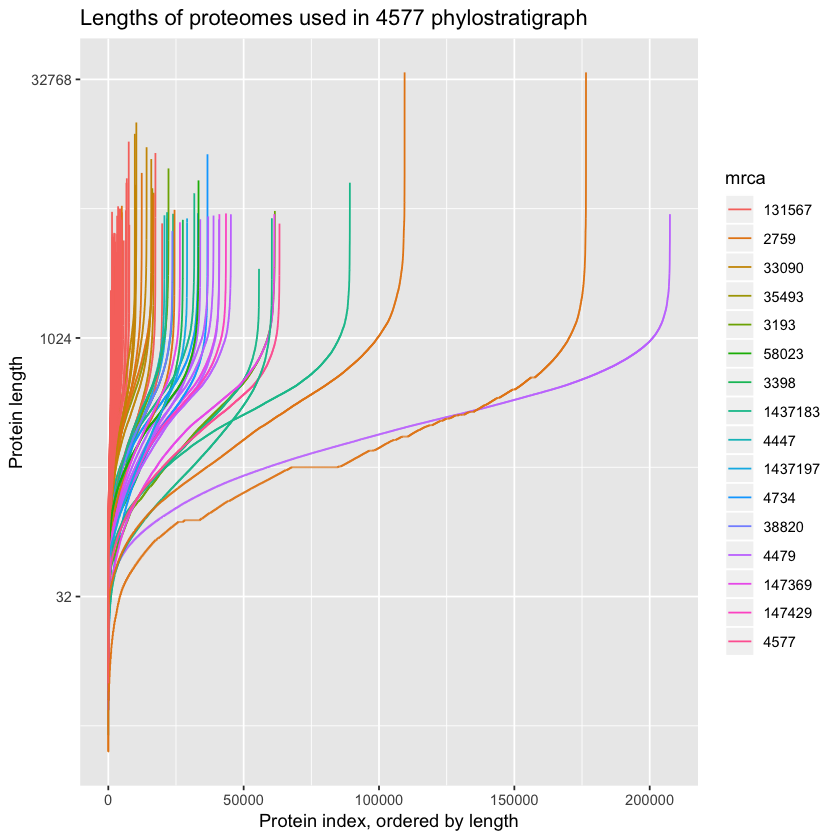

In [39]:
#Plot the ordered lengths of all proteins in all proteomes

plot_proteome_lengths(strata_b)

Using species, mrca as id variables


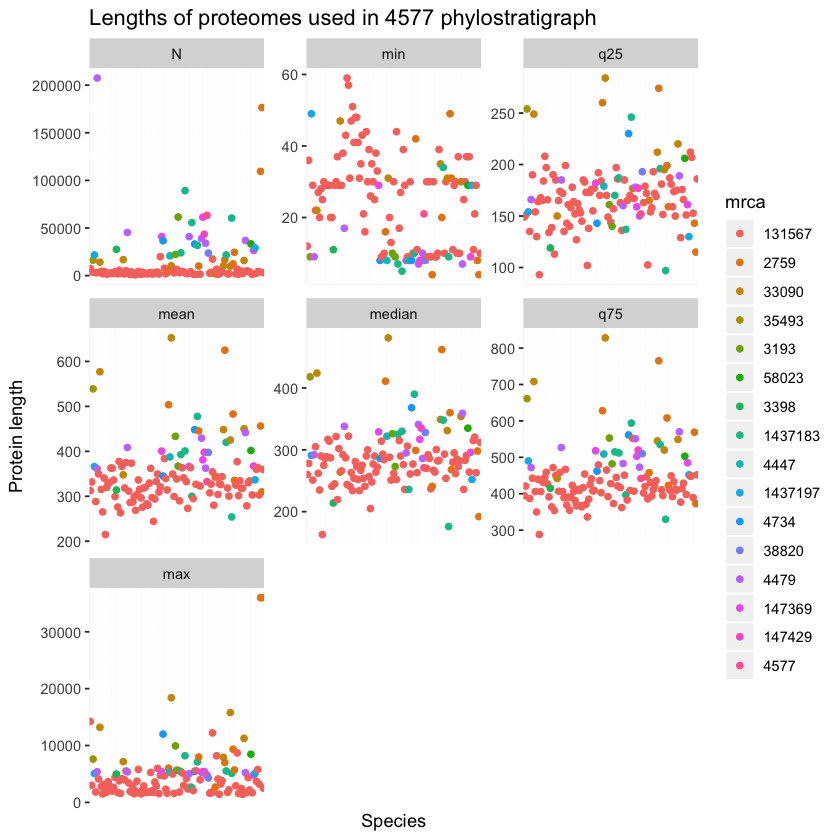

In [40]:
#Plot summary statistics for all proteomes 

plot_proteome_stats(strata_b)

In [41]:
ph <- stratify(results_b, classify_by_adjusted_pvalue(0.001))
head(ph)

qseqid,mrca,ps,mrca_name
GRMZM2G356204_P01,131567,1,cellular organisms
GRMZM2G144196_P01,131567,1,cellular organisms
GRMZM2G144196_P02,131567,1,cellular organisms
GRMZM2G144196_P03,131567,1,cellular organisms
GRMZM2G022054_P01,131567,1,cellular organisms
GRMZM2G022054_P03,131567,1,cellular organisms


In [42]:
write.table(x = ph,
            file = "B73_PS_phylostratr_181128.txt",
            sep="\t",
            quote=F)

In [44]:
summary(ph$mrca_name)

cellular organisms          Eukaryota      Viridiplantae       Streptophyta 
             21782              14629               4180               3123 
       Embryophyta       Tracheophyta      Magnoliophyta    Mesangiospermae 
              4552                390               2276               1512 
        Liliopsida      Petrosaviidae        commelinids             Poales 
                58                235                326                149 
           Poaceae        Panicoideae      Andropogoneae           Zea mays 
              2079                627                249               7066

In [48]:
levels(ph$mrca_name)
levels(ph$mrca_name) %>% length

[1] "cellular organisms" "Eukaryota"          "Viridiplantae"     
 [4] "Streptophyta"       "Embryophyta"        "Tracheophyta"      
 [7] "Magnoliophyta"      "Mesangiospermae"    "Liliopsida"        
[10] "Petrosaviidae"      "commelinids"        "Poales"            
[13] "Poaceae"            "Panicoideae"        "Andropogoneae"     
[16] "Zea mays"

[1] 16

In [45]:
tree_size(strata_b)

[1] 181

In [46]:
strata_b@tree


Phylogenetic tree with 127 tips and 54 internal nodes.

Tip labels:
	3702, 4932, 9606, 1194090, 1797576, 572547, ...
Node labels:
	131567, 2759, 33090, 35493, 3193, 58023, ...

Unrooted; no branch lengths.